In [15]:
from cell.word2vec_training_data import *
from cell.word2vec_model import *
from sklearn.decomposition import PCA
from sklearn import preprocessing
from cell import  utils, analysis, plot_utils

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


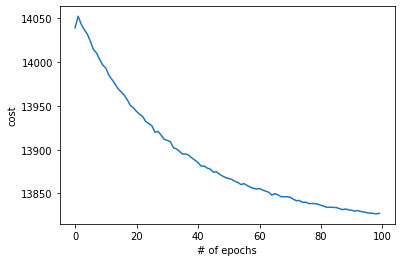

In [34]:
paras= skipgram_model_training(X, 
                        Y_one_hot, 
                        vocab_size, 
                        20, 
                        2, 
                        100, 
                        batch_size=128, 
                        parameters=None, 
                        print_cost=False)

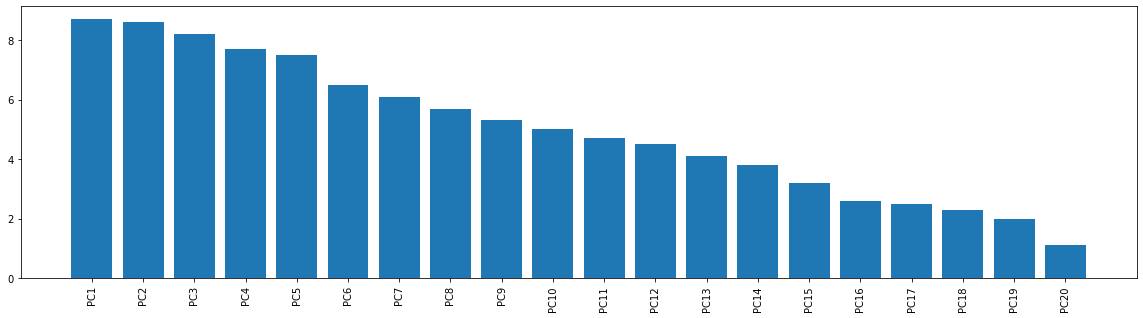

In [35]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=20)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

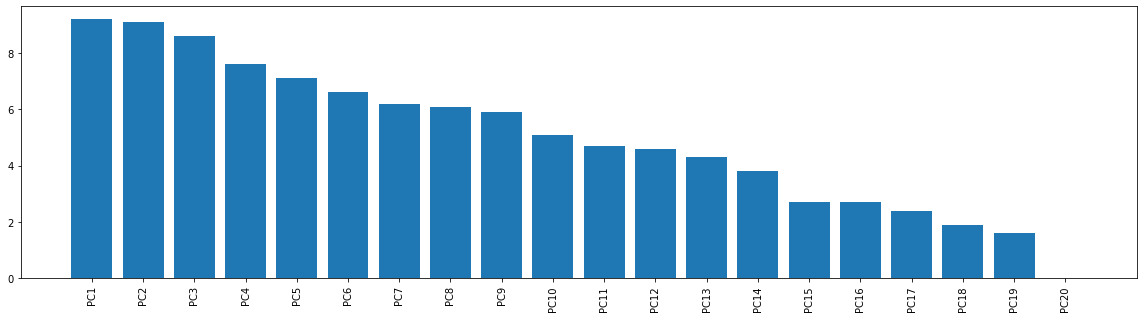

In [31]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=20)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

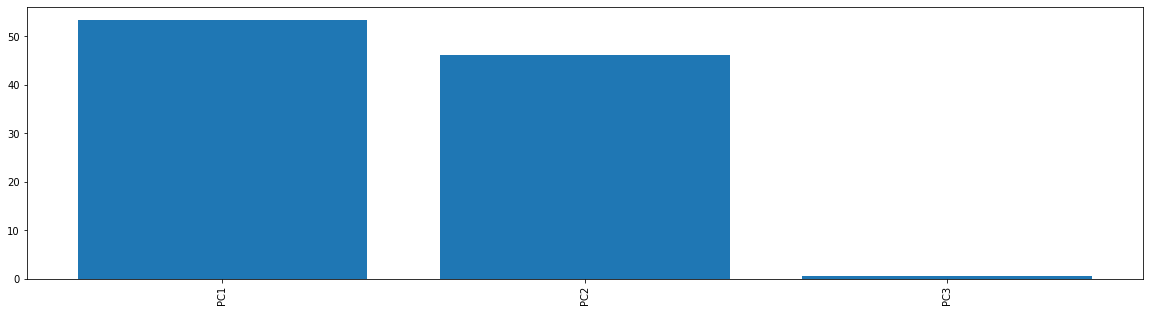

In [26]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


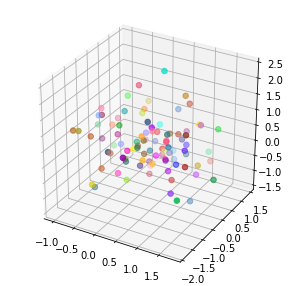

In [37]:
cldf = utils.read_visp_npp_cldf()
cldf.head()
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": paras['WRD_EMB']},
                                                 index = word_to_id.keys(),
                                                 ndim=20, cl_df=cldf)
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))